In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1= pd.read_excel('Analytics_Test_&_Data Set_Instructions.xlsx', sheet_name='RFI Data')

df2=pd.read_excel('Analytics_Test_&_Data Set_Instructions.xlsx', sheet_name='RFI_Clean_Data')
df3=pd.read_excel('Analytics_Test_&_Data Set_Instructions.xlsx', sheet_name='Raw GA Data')

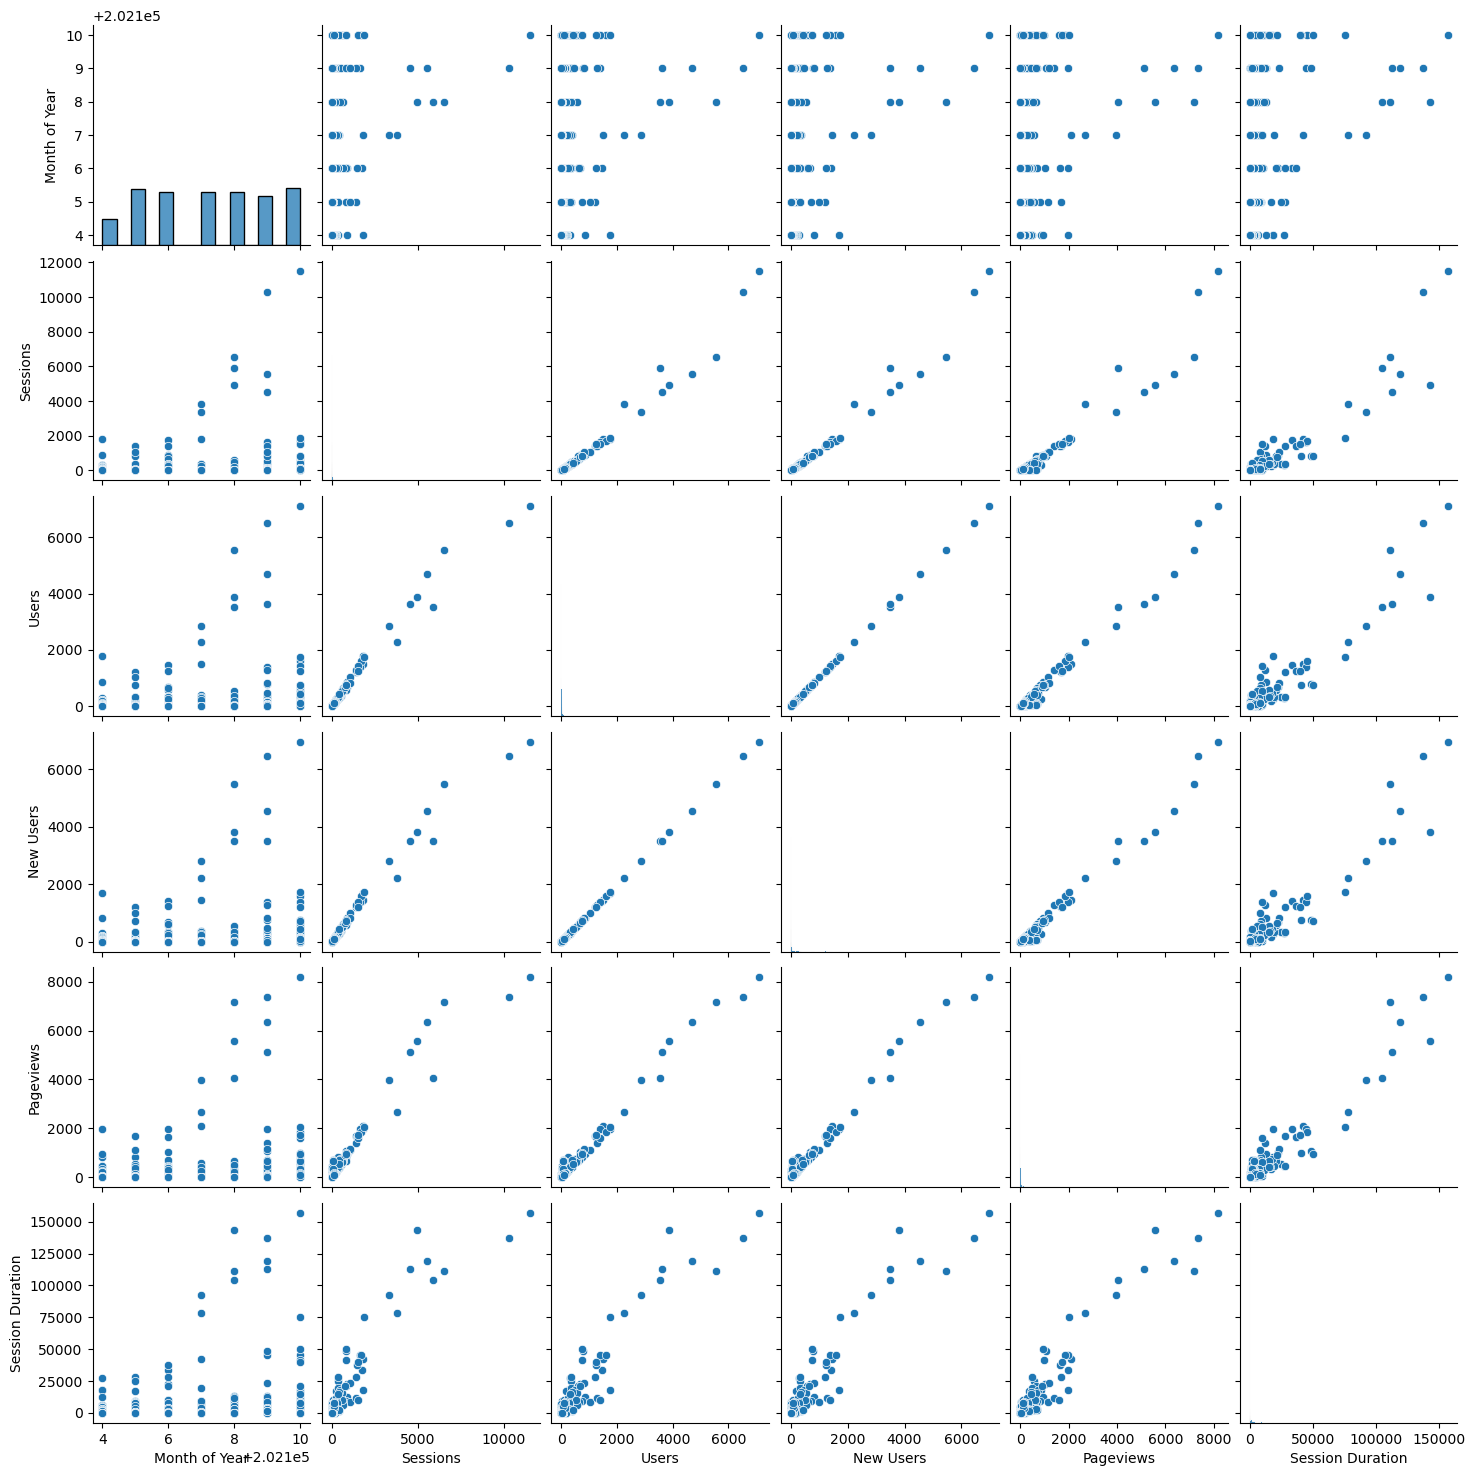

C:\Users\David\AppData\Local\Temp\ipykernel_30804\1160450602.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df3.corr()


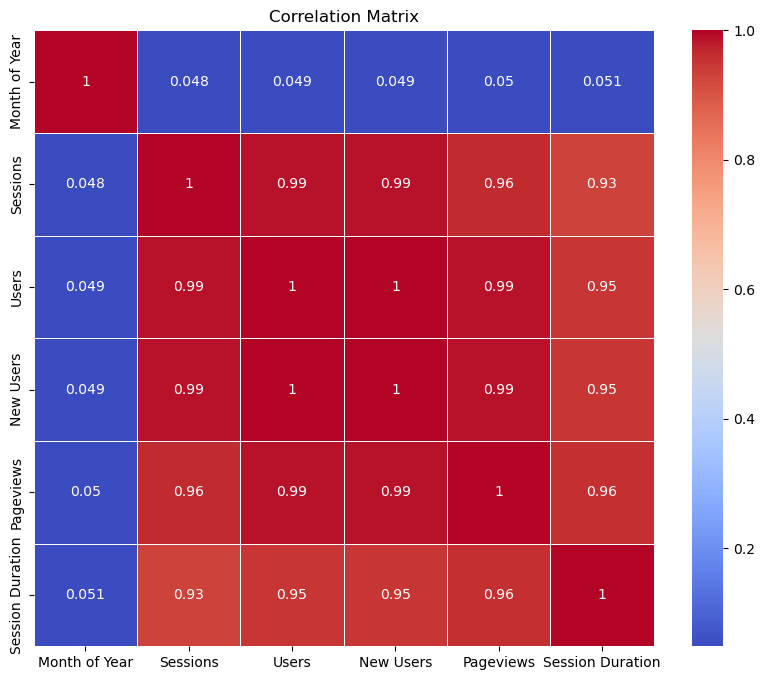

In [14]:

# Display the pairplot
sns.pairplot(df3)
plt.show()

# Calculate the correlation matrix
correlation_matrix = df3.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [15]:
df1.dtypes

Campaign                  object
Month                     object
Site (Site Directory)     object
Placement - DCM           object
Creative                  object
Creative Dimensions       object
Platform Type             object
Impressions                int64
Clicks                     int64
Unnamed: 9               float64
dtype: object

In [26]:
df1['Month'] = pd.to_datetime(df1['Month'])
def format_without_sci(x):
    return '{:.0f}'.format(x)

# Set the float_format option to use the custom formatting function
pd.options.display.float_format = format_without_sci

# Use describe() to get summary statistics
summary = df1.describe()
summary

,Impressions,Clicks,Unnamed: 9,CTR
count,4244,4244,40,3925
mean,26638,70,1,inf
std,133656,667,0,NaN
min,0,0,1,0
25%,11,0,1,0
50%,609,1,1,0
75%,9265,10,1,0
max,3596390,22067,2,inf


In [17]:
df3.describe()

,Month of Year,Sessions,Users,New Users,Pageviews,Session Duration
count,2403,2403,2403,2403,2403,2403
mean,202107,56,46,45,71,1338
std,2,436,310,304,391,8163
min,202104,1,1,0,1,0
25%,202106,2,2,2,2,0
50%,202107,6,6,5,7,4
75%,202109,18,17,17,25,462
max,202110,11516,7108,6959,8179,157060


In [18]:
df2.describe()

,Impressions,Clicks
count,4244,4244
mean,26638,70
std,133656,667
min,0,0
25%,11,0
50%,609,1
75%,9265,10
max,3596390,22067


Number of Impressions > 0: 3861
Number of non-zero Clicks: 2466


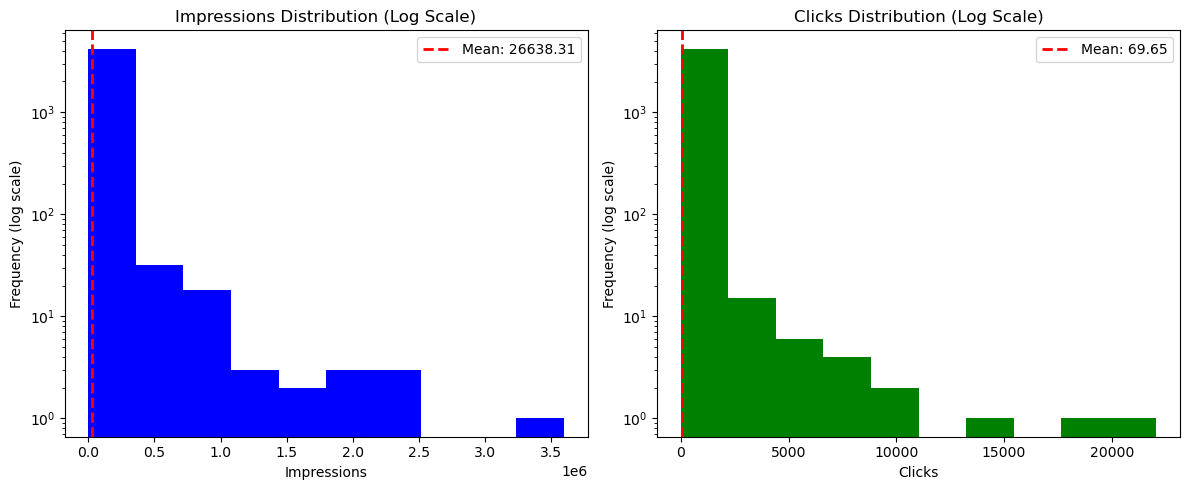

In [27]:
import matplotlib.pyplot as plt

# Create subplots
plt.figure(figsize=(12, 5))

# Plot for Impressions
plt.subplot(1, 2, 1)
plt.hist(df1['Impressions'], bins=10, color='blue', log=True)
plt.title('Impressions Distribution (Log Scale)')
plt.xlabel('Impressions')
plt.ylabel('Frequency (log scale)')
# Calculate the mean of Impressions
mean_impressions = df1['Impressions'].mean()
plt.axvline(mean_impressions, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_impressions:.2f}')
plt.legend()

# Calculate the number of Impressions greater than 0
num_impressions_gt_0 = (df1['Impressions'] > 0).sum()
print(f"Number of Impressions > 0: {num_impressions_gt_0}")

# Plot for Clicks
plt.subplot(1, 2, 2)
plt.hist(df1['Clicks'], bins=10, color='green', log=True)
plt.title('Clicks Distribution (Log Scale)')
plt.xlabel('Clicks')
plt.ylabel('Frequency (log scale)')
# Calculate the mean of Clicks
mean_clicks = df1['Clicks'].mean()
plt.axvline(mean_clicks, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_clicks:.2f}')
plt.legend()

# Calculate the number of non-zero Clicks
num_non_zero_clicks = (df1['Clicks'] != 0).sum()
print(f"Number of non-zero Clicks: {num_non_zero_clicks}")

plt.tight_layout()

plt.show()


Text(0, 0.5, 'Frequency (log scale)')

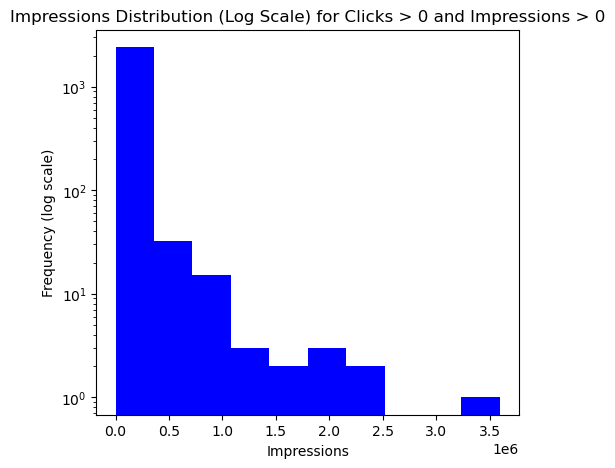

In [20]:
import matplotlib.pyplot as plt

# Create subplots
plt.figure(figsize=(12, 5))

# Create a histogram for the distribution of "Clicks" and "Impressions" both greater than 0
plt.subplot(1, 2, 1)
clicks_condition = (df1['Clicks'] > 0) 
plt.hist(df1[clicks_condition]['Impressions'], bins=10, color='blue', log=True)
plt.title('Impressions Distribution (Log Scale) for Clicks > 0 and Impressions > 0')
plt.xlabel('Impressions')
plt.ylabel('Frequency (log scale)')




In [22]:
placement_counts = df['Placement - DCM'].value_counts()
print(placement_counts)


Skin Disease Crossix Segment Targeting                             584
Skin Disease Swoop Segment Targeting                               423
Skin Disease Dx Signal-Based Custom Segment Targeting_Caregiver    279
Skin Disease Dx Signal-Based Custom Segment Targeting_Patient      266
Skin Disease Member Reach                                          220
SD.net Condition Center Sponsorship                                197
Audience Targeting Media - SD Only                                 184
Rotational Banner on SD condition center                           184
SD.net Premium Display                                             180
Skin Disease Claim-Based Custom Segment Targeting                  176
SD.net Premium Display AV                                          160
Skin Disease Swoop Segment Targeting AV                            138
Dermicool Drug Monograph on WebMD.com AV                           138
Skin Disease Disease Display Media                                 134
Skin D

In [23]:
#Queremos saber cuales son las variables continuas y cuales son las categoricaa
data_type=df1.dtypes
data_type

Campaign                         object
Month                    datetime64[ns]
Site (Site Directory)            object
Placement - DCM                  object
Creative                         object
Creative Dimensions              object
Platform Type                    object
Impressions                       int64
Clicks                            int64
Unnamed: 9                      float64
dtype: object

In [24]:
df1['CTR'] = (df1['Clicks'] / df1['Impressions']) 

ValueError: supplied range of [4.876333738231578e-07, inf] is not finite

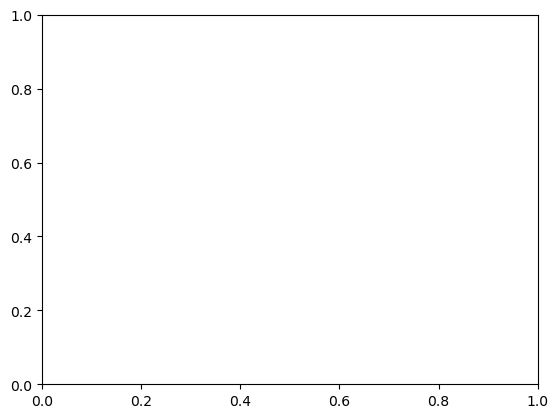

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame 'df1' with 'Clicks' and 'Impressions' columns
df1['CTR'] = df1['Clicks'] / df1['Impressions']

# Filter out CTR values that are not equal to 0
df1_filtered = df1[df1['CTR'] != 0]

# Create a histogram of the filtered 'CTR' variable
plt.hist(df1_filtered['CTR'], bins=20, edgecolor='k')
plt.xlabel('CTR')
plt.ylabel('Frequency')
plt.title('Click-Through Rate (CTR) Histogram (Excluding 0.000)')

# Show the plot
plt.show()


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_excel('Analytics_Test_&_Data Set_Instructions.xlsx', sheet_name='RFI Data')

# Calculate CTR for each campaign
df['CTR'] = (df['Clicks'] / df['Impressions']) * 100

# Group the data by campaign to calculate total Impressions and Clicks
site_summary = df.groupby('Site (Site Directory)')[['Impressions', 'Clicks']].sum().reset_index()

# Display the results
print("CTR and Campaign Summary:")
print(df[['Campaign', 'CTR']])

print("\nTotal Impressions and Clicks by Campaign:")
print(site_summary)

CTR and Campaign Summary:
                                        Campaign       CTR
0     200 Arabia Dermicool FY21 SDP DTP Media PT  1.619433
1     200 Arabia Dermicool FY21 SDP DTP Media PT  1.472995
2     200 Arabia Dermicool FY21 SDP DTP Media PT  0.240096
3     200 Arabia Dermicool FY21 SDP DTP Media PT  0.943396
4     200 Arabia Dermicool FY21 SDP DTP Media PT  1.344136
...                                          ...       ...
4239  200 Arabia Dermicool FY21 SDP DTP Media PT  0.043985
4240  200 Arabia Dermicool FY21 SDP DTP Media PT  0.206650
4241  200 Arabia Dermicool FY21 SDP DTP Media PT  0.341297
4242  200 Arabia Dermicool FY21 SDP DTP Media PT  0.037594
4243  200 Arabia Dermicool FY21 SDP DTP Media PT  0.383877

[4244 rows x 2 columns]

Total Impressions and Clicks by Campaign:
       Site (Site Directory)  Impressions  Clicks
0          Adprime Media Inc            0    3328
1                 Adtheorent       123485     153
2               Aptus Health     25645693   4373

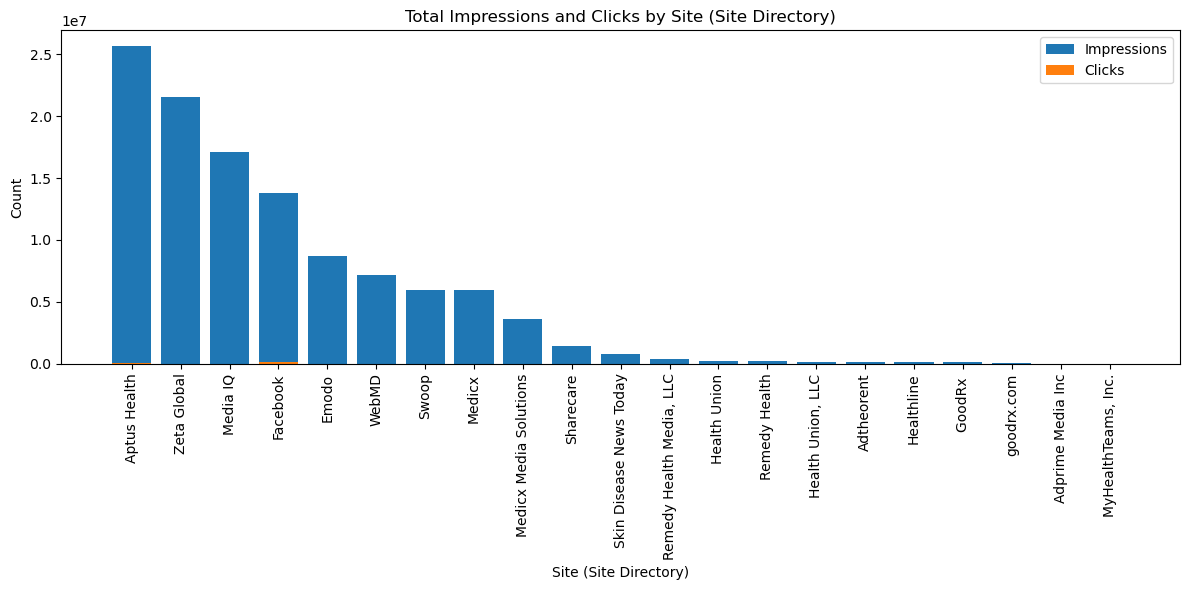

In [ ]:
site_summary['Total'] = site_summary['Impressions'] + site_summary['Clicks']

# Sort the DataFrame by Total in ascending order
site_summary_sorted = site_summary.sort_values(by='Total', ascending=False)

# Plot Total Impressions and Clicks by Site, sorted by ascending Total
plt.figure(figsize=(12, 6))
plt.bar(site_summary_sorted['Site (Site Directory)'], site_summary_sorted['Impressions'], label='Impressions')
plt.bar(site_summary_sorted['Site (Site Directory)'], site_summary_sorted['Clicks'], label='Clicks')
plt.xticks(rotation=90)
plt.xlabel('Site (Site Directory)')
plt.ylabel('Count')
plt.title('Total Impressions and Clicks by Site (Site Directory)')
plt.legend()
plt.tight_layout()
plt.show()

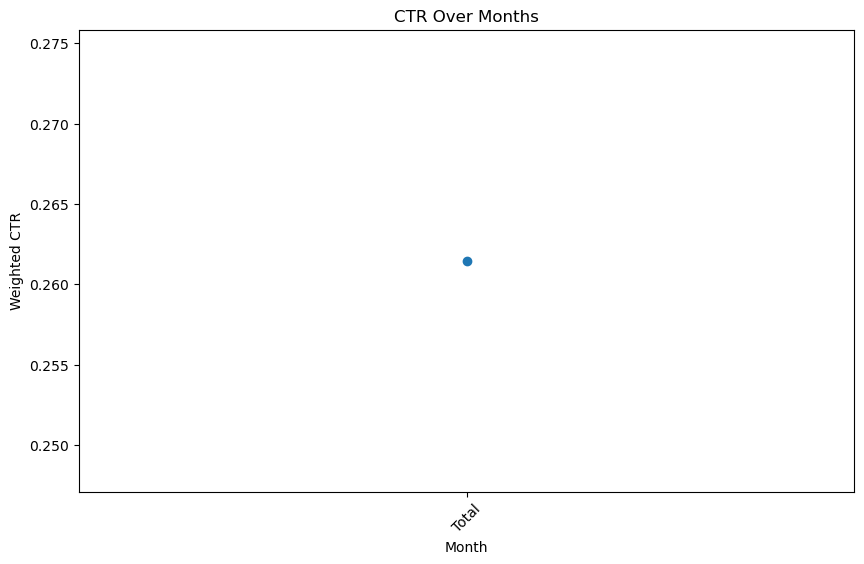

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd



def calculate_ctr(row):
    clicks = row['Clicks']
    impressions = row['Impressions']
    if impressions == 0 or clicks == 0:
        return 0
    return (clicks / impressions) * 100

# Apply the function to each row
df1['CTR'] = df1.apply(calculate_ctr, axis=1)

# Drop rows with missing CTR values
df1 = df1.dropna(subset=['CTR'])

# Group data by 'Site (Site Directory)' and calculate the average CTR
site_ctr = df1.groupby('Site (Site Directory)')['CTR'].mean()

# Plot the data
plt.figure(figsize=(10, 6))
site_ctr.plot(kind='bar')
plt.title('Expected CTR by Site')
plt.xlabel('Site')
plt.ylabel('Expected CTR')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Annotate each bar with the CTR value
for i, ctr in enumerate(site_ctr):
    plt.annotate(f'{ctr:.2f}', (i, ctr), ha='center', va='bottom')

plt.show()

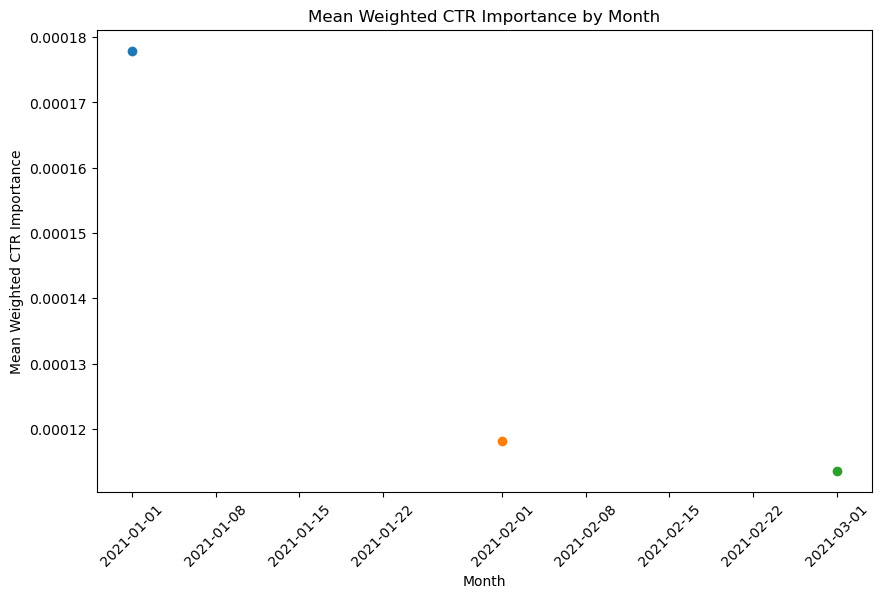

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df1' is your DataFrame in Power BI

# Calculate CTR with row-specific weights
df1['Weighted_CTR'] = (df1['Clicks'] / df1['Impressions']) * 100

# Create a new column 'Importance' based on total impressions and clicks
total_clicks = df1['Clicks'].sum()
total_impressions = df1['Impressions'].sum()
df1['Importance'] = (df1['Clicks'] + df1['Impressions']) / (total_clicks + total_impressions)

# Calculate CTR weighted by importance
df1['Weighted_CTR_Importance'] = df1['Weighted_CTR'] * df1['Importance']

# Group data by 'Month' and calculate the mean of 'Weighted_CTR_Importance' for each month
monthly_mean_weighted_ctr = df1.groupby('Month')['Weighted_CTR_Importance'].mean()

# Plot the data for each month
plt.figure(figsize=(10, 6))
for month, data in monthly_mean_weighted_ctr.items():
    plt.plot([month], [data], marker='o', linestyle='-')

plt.title('Mean Weighted CTR Importance by Month')
plt.xlabel('Month')
plt.ylabel('Mean Weighted CTR Importance')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Display the graph in the Power BI report
plt.show()


# Now 'Weighted_CTR_Importance' contains CTR values weighted by importance


In [ ]:
monthly_mean_weighted_ctr

Month
2021-01-01     0
2021-02-01     0
2021-03-01     0
2021-04-01   NaN
2021-05-01   NaN
2021-06-01   NaN
2021-07-01   NaN
2021-08-01   NaN
2021-09-01   NaN
2021-10-01   NaN
Name: Weighted_CTR_Importance, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df1' is your DataFrame in Power BI

# Sort the DataFrame by 'Timestamp' if not already sorted
df1 = df1.sort_values(by='Timestamp')

# Plot the 'Weighted_CTR_Importance' values over time
plt.figure(figsize=(10, 6))
plt.plot(df1['Timestamp'], df1['Weighted_CTR_Importance'], marker='o', linestyle='-')
plt.title('Weighted CTR Importance Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Weighted CTR Importance')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Display the graph in the Power BI report
plt.show()


KeyError: 'Timestamp'

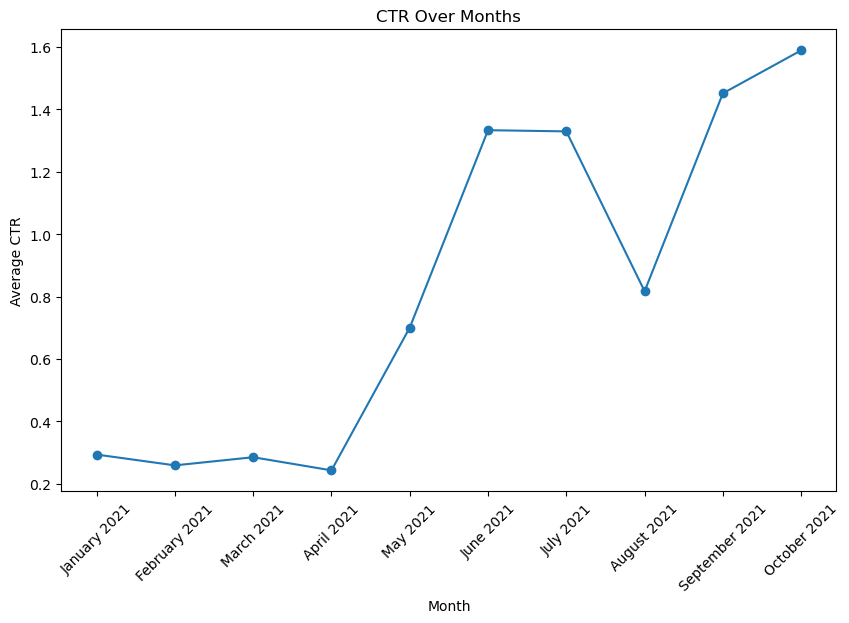

In [ ]:
# Assuming 'df1' is your DataFrame in Power BI

# Group data by 'Month' and calculate the average CTR
monthly_ctr = df1.groupby('Month')['CTR'].mean()

# Extract the month names from the 'Month' column
month_names = monthly_ctr.index.strftime('%B %Y')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(month_names, monthly_ctr, marker='o', linestyle='-')
plt.title('CTR Over Months')
plt.xlabel('Month')
plt.ylabel('Average CTR')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Display the graph in the Power BI report
plt.show()

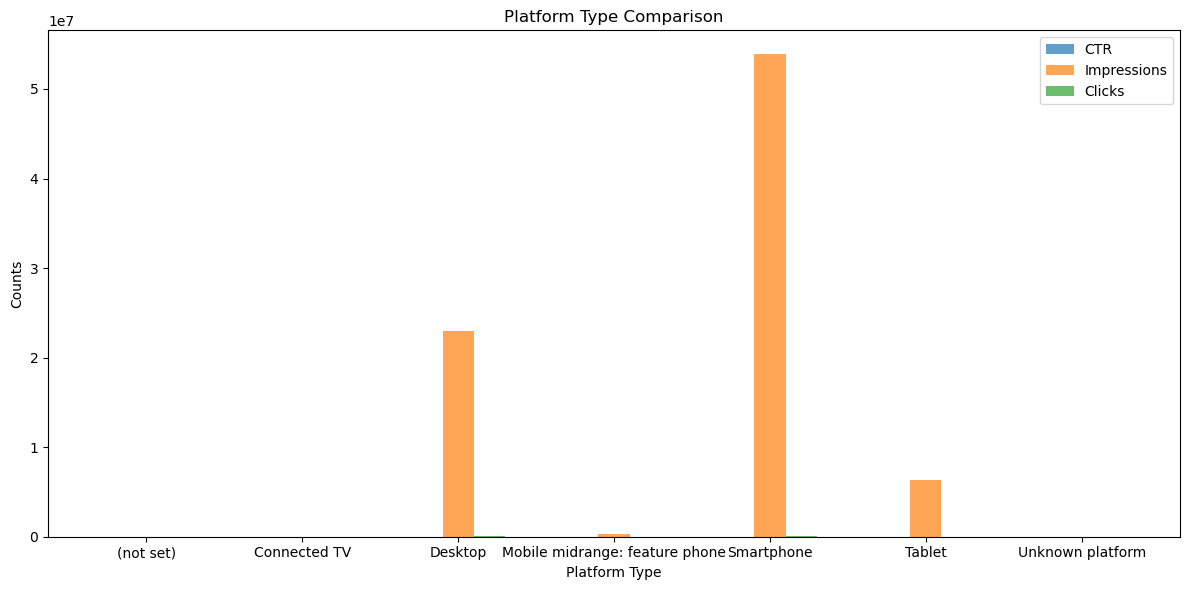

In [ ]:
platform_summary = df.groupby('Platform Type')[['CTR', 'Impressions', 'Clicks']].sum().reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Define the width of each bar
bar_width = 0.2

# Set the positions for the bars
x = range(len(platform_summary))

# Create the bars for CTR, Impressions, and Clicks
plt.bar(x, platform_summary['CTR'], width=bar_width, label='CTR', align='center', alpha=0.7)
plt.bar([i + bar_width for i in x], platform_summary['Impressions'], width=bar_width, label='Impressions', align='center', alpha=0.7)
plt.bar([i + bar_width * 2 for i in x], platform_summary['Clicks'], width=bar_width, label='Clicks', align='center', alpha=0.7)

# Set the x-axis labels and rotate them for readability
plt.xticks([i + bar_width for i in x], platform_summary['Platform Type'], rotation=0)

# Add labels, legends, and a title
plt.xlabel('Platform Type')
plt.ylabel('Counts')
plt.title('Platform Type Comparison')
plt.legend()

# Display the graph
plt.tight_layout()
plt.show()

In [ ]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4244 entries, 0 to 4243
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Campaign               4244 non-null   object
 1   Month                  4244 non-null   object
 2   Site (Site Directory)  4244 non-null   object
 3   Placement - DCM        4244 non-null   object
 4   Creative               4244 non-null   object
 5   Creative Dimensions    4244 non-null   object
 6   Platform Type          3668 non-null   object
 7   Impressions            4244 non-null   int64 
 8   Clicks                 4244 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 298.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4244 entries, 0 to 4243
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Campaign               4244 non-null   object
 1   Month                  4244 non-null   object
 2   Site (Site Directory)  4244 non-null   object
 3   Placement - DCM        4244 non-null   object
 4   Creative               4244 non-null   object
 5   Creative Dimensions    4244 non-null   object
 6   Platform Type          3668 non-null   object
 7   Impressions            4244 non-null   int64 
 8   Clicks                 4244 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 298.5+ KB


### Dataset 2


In [ ]:
df2=pd.read_excel('Analytics_Test_&_Data Set_Instructions.xlsx', sheet_name='Raw GA Data')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403 entries, 0 to 2402
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Source            2403 non-null   object
 1   Month of Year     2403 non-null   int64 
 2   Device Category   2223 non-null   object
 3   Ad Content        2403 non-null   object
 4   Sessions          2403 non-null   int64 
 5   Users             2403 non-null   int64 
 6   New Users         2403 non-null   int64 
 7   Pageviews         2403 non-null   int64 
 8   Session Duration  2403 non-null   int64 
 9   Calculated AToS   2403 non-null   object
dtypes: int64(6), object(4)
memory usage: 187.9+ KB


In [ ]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403 entries, 0 to 2402
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Source            2403 non-null   object
 1   Month of Year     2403 non-null   int64 
 2   Device Category   2223 non-null   object
 3   Ad Content        2403 non-null   object
 4   Sessions          2403 non-null   int64 
 5   Users             2403 non-null   int64 
 6   New Users         2403 non-null   int64 
 7   Pageviews         2403 non-null   int64 
 8   Session Duration  2403 non-null   int64 
 9   Calculated AToS   2403 non-null   object
dtypes: int64(6), object(4)
memory usage: 187.9+ KB


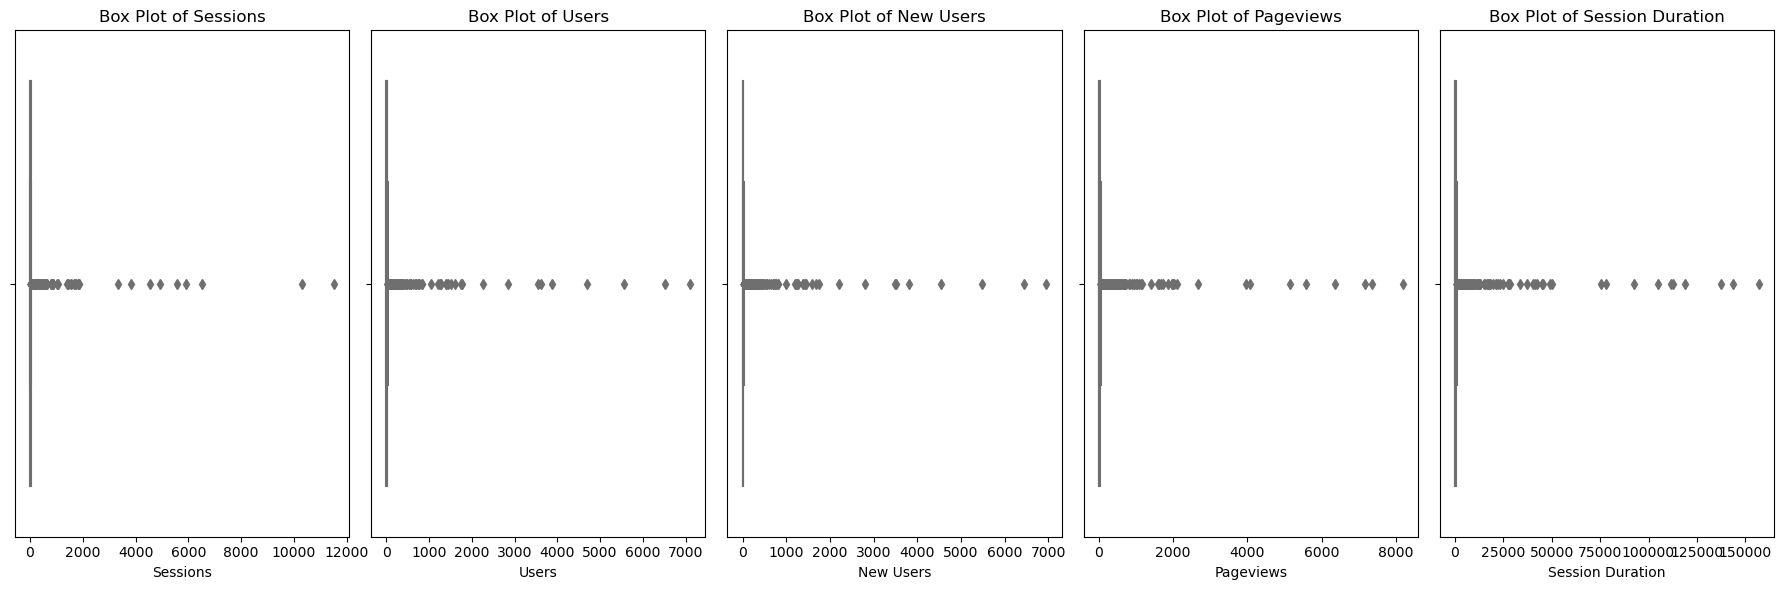

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df2 with the relevant columns

# Define the columns to create boxplots for
columns_to_plot = ["Sessions", "Users", "New Users", "Pageviews", "Session Duration"]

# Create a figure with subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(18, 6))

# Create boxplots for each variable
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=col, data=df2, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Box Plot of {col}")
    axes[i].set_xlabel(col)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


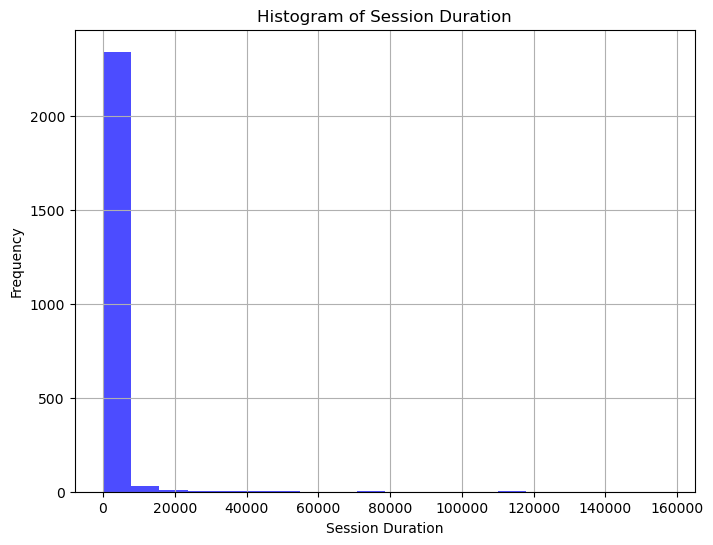

NameError: name 'new_users_data' is not defined

<Figure size 1000x500 with 0 Axes>

In [12]:
campaign_data = df2.groupby(["Source", "Ad Content", "Device Category"]).agg(
    {'Sessions': 'sum', 'Users': 'sum', 'New Users': 'sum', 'Pageviews': 'sum', 'Session Duration': 'mean'}
).reset_index()


KeyError: 'Source'

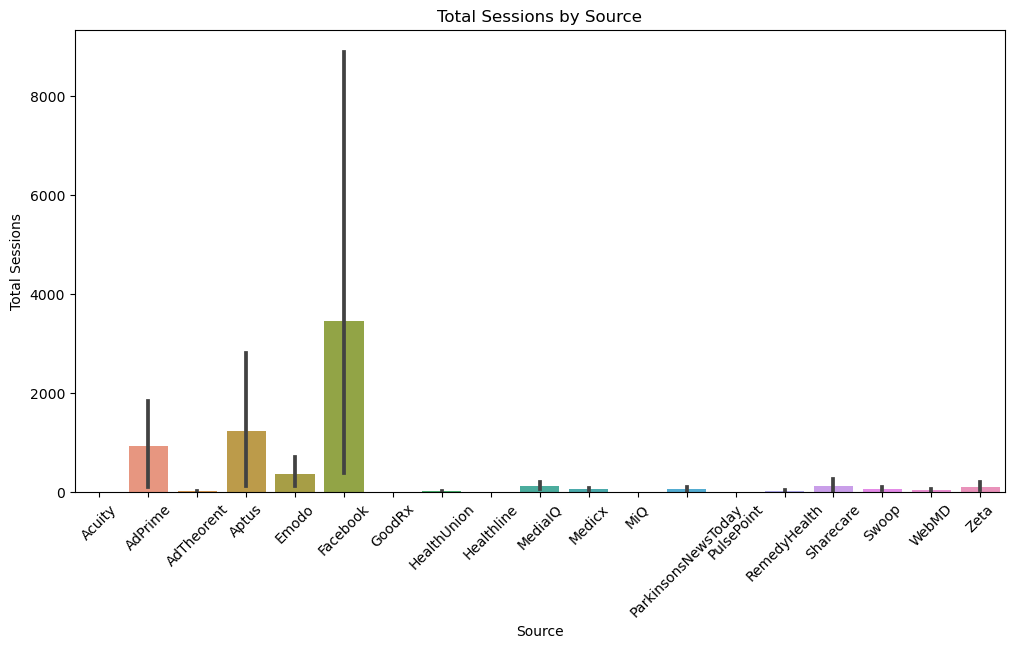

In [39]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Source', y='Sessions', data=campaign_data)
plt.title("Total Sessions by Source")
plt.xlabel("Source")
plt.ylabel("Total Sessions")
plt.xticks(rotation=45)
plt.show()


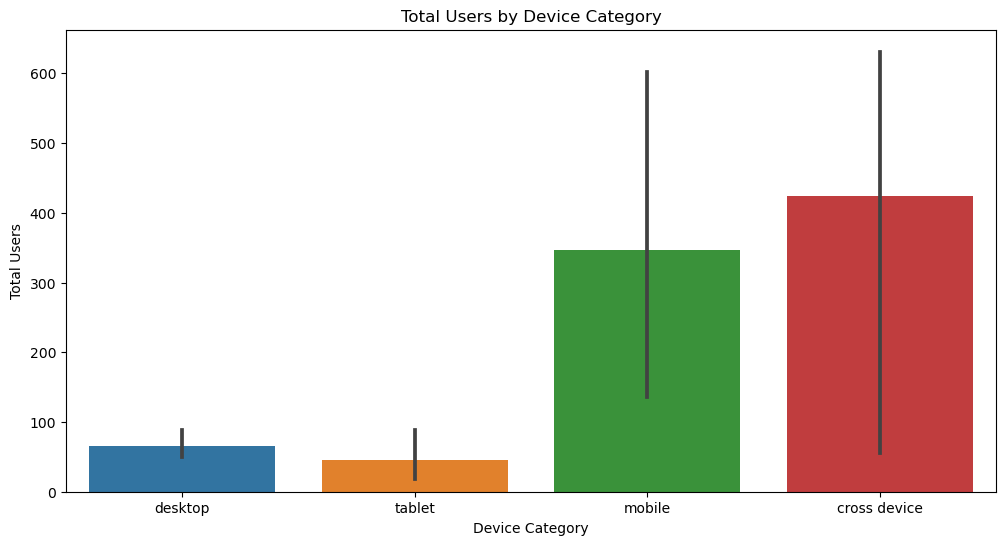

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='Device Category', y='Users', data=campaign_data)
plt.title("Total Users by Device Category")
plt.xlabel("Device Category")
plt.ylabel("Total Users")
plt.show()


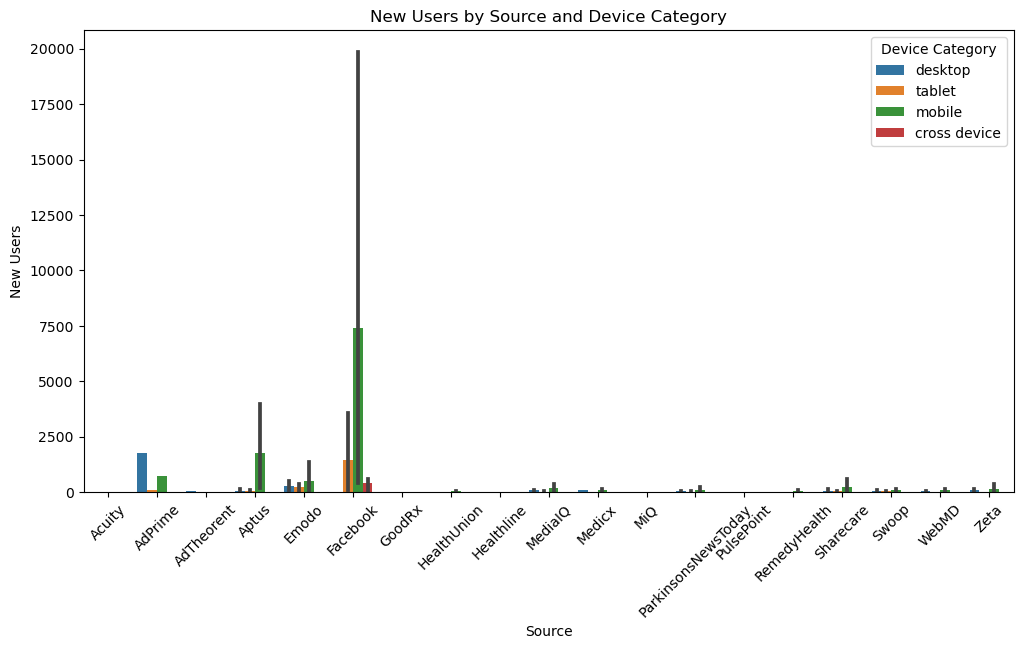

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Source', y='New Users', hue='Device Category', data=campaign_data)
plt.title("New Users by Source and Device Category")
plt.xlabel("Source")
plt.ylabel("New Users")
plt.legend(title="Device Category")
plt.xticks(rotation=45)
plt.show()


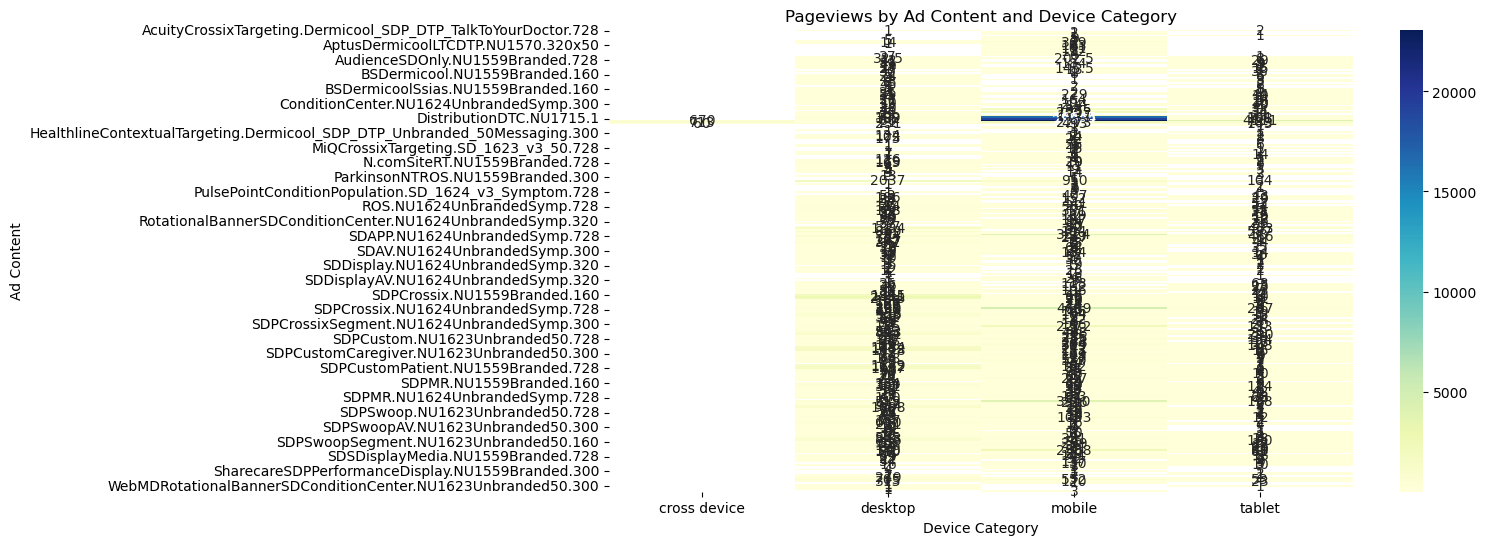

In [42]:
pivot_table = campaign_data.pivot_table(values='Pageviews', index='Ad Content', columns='Device Category')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title("Pageviews by Ad Content and Device Category")
plt.xlabel("Device Category")
plt.ylabel("Ad Content")
plt.show()


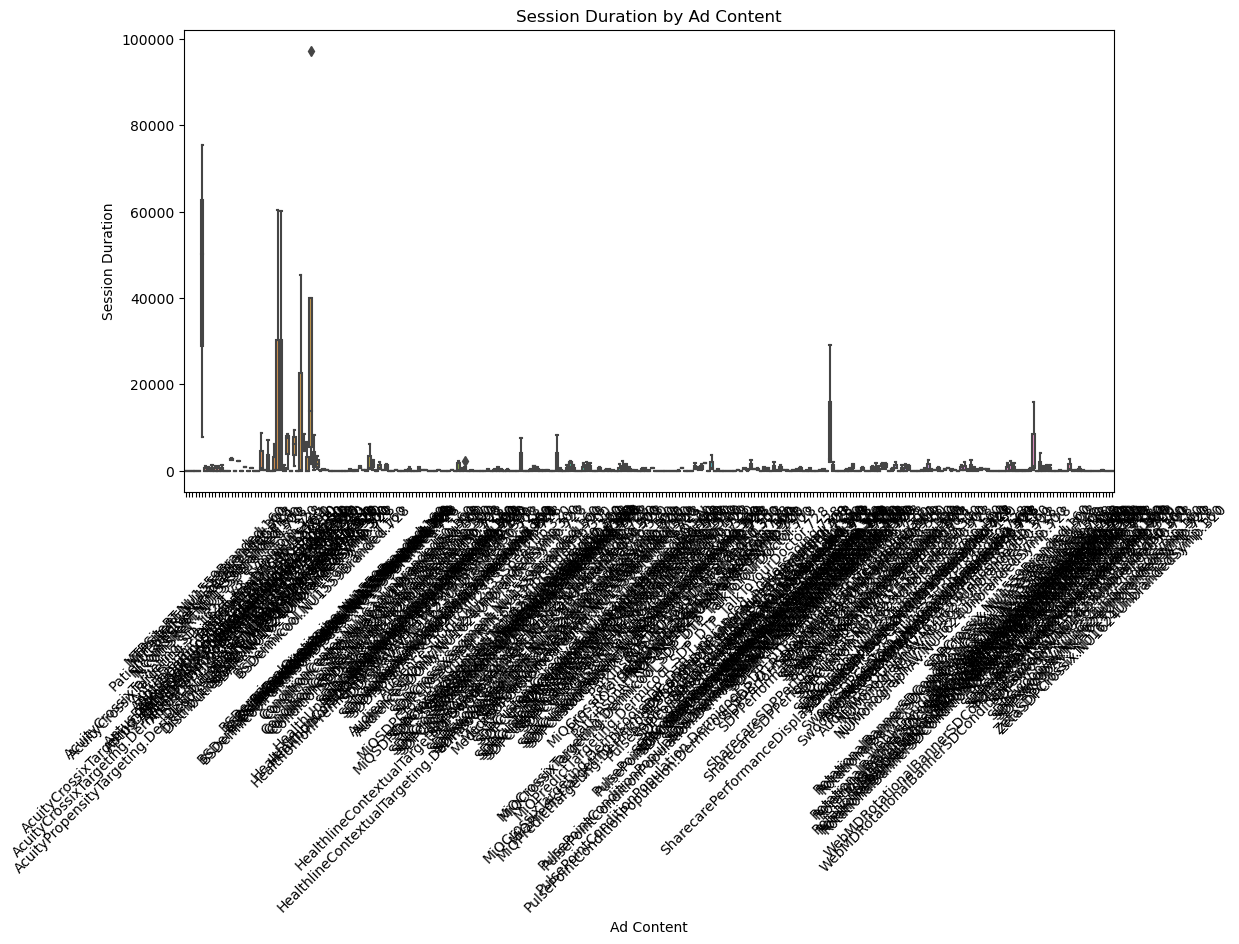

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ad Content', y='Session Duration', data=campaign_data)
plt.title("Session Duration by Ad Content")
plt.xlabel("Ad Content")
plt.ylabel("Session Duration")
plt.xticks(rotation=45)
plt.show()


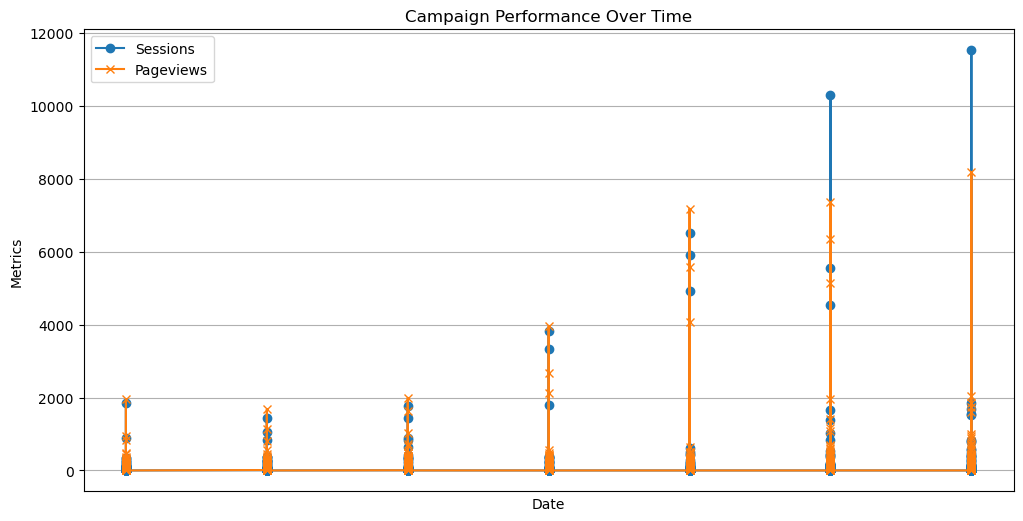

In [47]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with a date or timestamp column
df2['Month of Year'] = pd.to_datetime(df2['Month of Year'])  # Convert to datetime if needed
plt.figure(figsize=(12, 6))
plt.plot(df2['Month of Year'], df2['Sessions'], label='Sessions', marker='o')
plt.plot(df2['Month of Year'], df2['Pageviews'], label='Pageviews', marker='x')
plt.title("Campaign Performance Over Time")
plt.xlabel("Date")
plt.ylabel("Metrics")
plt.legend()
plt.grid(True)
plt.show()


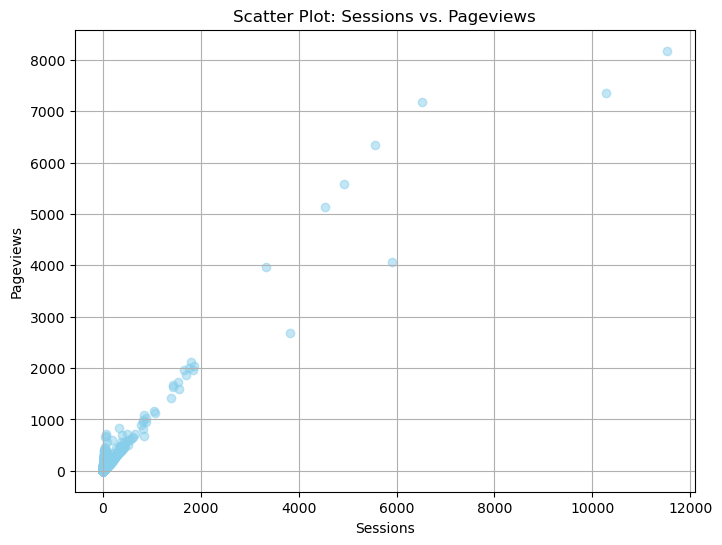

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(df2['Sessions'], df2['Pageviews'], alpha=0.5, color='skyblue')
plt.title("Scatter Plot: Sessions vs. Pageviews")
plt.xlabel("Sessions")
plt.ylabel("Pageviews")
plt.grid(True)


C:\Users\David\AppData\Local\Temp\ipykernel_21692\3403991228.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


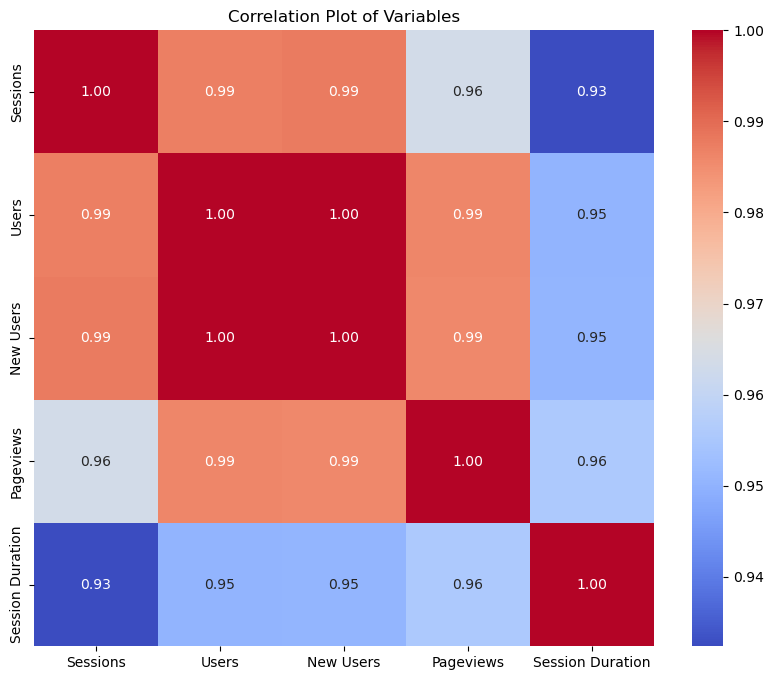

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df2 with the relevant columns

# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Plot of Variables")
plt.show()


C:\Users\David\AppData\Local\Temp\ipykernel_21692\33885989.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


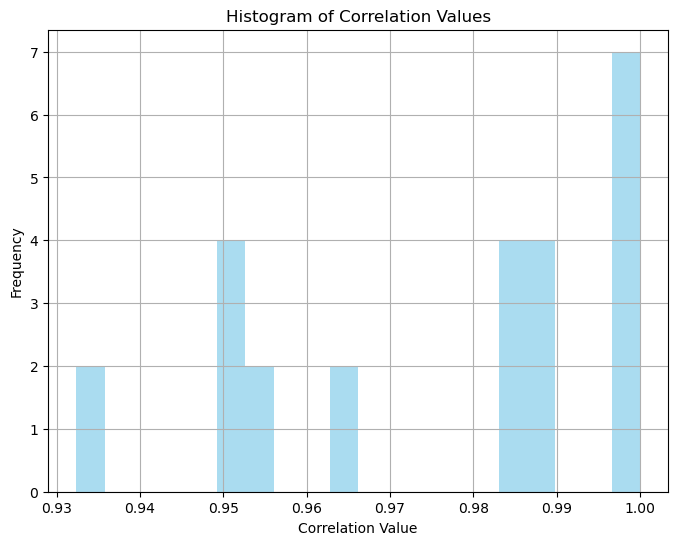

[1.0, 0.9873190159850888, 0.9876805920826579, 0.9634159171923039, 0.932374110901437, 0.9873190159850888, 1.0, 0.9999491470017924, 0.9860123944615954, 0.9501520002684896, 0.9876805920826579, 0.9999491470017924, 1.0, 0.9857775162771434, 0.9504067396933013, 0.9634159171923039, 0.9860123944615954, 0.9857775162771434, 1.0, 0.9556193660787149, 0.932374110901437, 0.9501520002684896, 0.9504067396933013, 0.9556193660787149, 1.0]


In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df2 with the relevant columns

# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Extract the correlation values and store them in a list
correlation_values = correlation_matrix.values.flatten().tolist()

# Create a histogram to visualize the distribution of correlation values
plt.figure(figsize=(8, 6))
plt.hist(correlation_values, bins=20, color='skyblue', alpha=0.7)
plt.title("Histogram of Correlation Values")
plt.xlabel("Correlation Value")
plt.ylabel("Frequency")
plt.grid(True)

# Display the plot
plt.show()

# If you want to inspect the correlation values list, you can print it
print(correlation_values)


In [52]:
import pandas as pd

# Assuming you have a DataFrame named df2 with the relevant columns

# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Extract the correlation values and their corresponding column pairs
correlation_values = []
column_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        column1 = correlation_matrix.columns[i]
        column2 = correlation_matrix.columns[j]
        correlation = correlation_matrix.iloc[i, j]
        correlation_values.append(correlation)
        column_pairs.append(f"{column1} - {column2}")

# Create a list of tuples with column pairs and their corresponding correlation values
correlation_list = list(zip(column_pairs, correlation_values))

# Print the list of column pairs and correlation values
for pair, value in correlation_list:
    print(f"{pair}: {value}")


Sessions - Users: 0.9873190159850888
Sessions - New Users: 0.9876805920826579
Sessions - Pageviews: 0.9634159171923039
Sessions - Session Duration: 0.932374110901437
Users - New Users: 0.9999491470017924
Users - Pageviews: 0.9860123944615954
Users - Session Duration: 0.9501520002684896
New Users - Pageviews: 0.9857775162771434
New Users - Session Duration: 0.9504067396933013
Pageviews - Session Duration: 0.9556193660787149


C:\Users\David\AppData\Local\Temp\ipykernel_21692\2024073343.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


In [73]:
import matplotlib.pyplot as plt

# Assuming 'df1' is your DataFrame in Power BI

# Sort the DataFrame by 'Timestamp' if not already sorted
df1 = df1.sort_values(by='Timestamp')

# Plot the 'Weighted_CTR_Importance' values over time
plt.figure(figsize=(10, 6))
plt.plot(df1['Timestamp'], df1['Weighted_CTR_Importance'], marker='o', linestyle='-')
plt.title('Weighted CTR Importance Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Weighted CTR Importance')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Display the graph in the Power BI report
plt.show()


KeyError: 'Timestamp'